In [1032]:
import pandas as pd
import datetime as dt
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tickers = ['AAPL', 'TSLA', 'NFLX', 'GM', 'AMZN', 'GOOG', 'TGT']
etf = ['SPY', 'IWM', 'DIA']

In [1033]:
data = yf.download(tickers + etf, period = '10y') ['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [1034]:
df['portfolio'] = df.mean(axis=1)
returns= df.pct_change()

In [1035]:
# Part 1: Create Table showing constituent (stocks) risk analysis in the equal - weight portfolio analysis as of the current date

In [1036]:
# Column 1 - Ticker
output = pd.DataFrame(index=tickers)

In [1037]:
# Column 2 - Portfolio Weight (equally weighted)
output['Portfolio Weight'] = 100 / len(output.index)

In [1038]:
# Column 3 - Annualized Volatility (using trailing 3-months)
output['Annual Volatility'] = data[-63:].std() * np.sqrt(4)

In [1039]:
# Column 4 - Beta against SPY (using trailing 12-months)
#https://www.learnpythonwithrune.org/calculate-the-market-sp-500-beta-with-python-for-any-stock/#:~:text=Step%203%3A%20Calculate%20the%20BETA
log_returns = np.log(data/data.shift())
cov = log_returns.cov()
var = log_returns['SPY'].var()

cov.loc[tickers, 'SPY']/var
output['Beta against SPY'] = cov.loc[tickers, 'SPY']/var

In [1040]:
# Column 5 - Beta against IWM (using trailing 12-months)
log_returns = np.log(data/data.shift())
cov = log_returns.cov()
var = log_returns['IWM'].var()

cov.loc[tickers, 'IWM']/var
output['Beta against IWM'] = cov.loc[tickers, 'IWM']/var

In [1041]:
# Column 6 - Beta against DIA (using trailing 12-months)
log_returns = np.log(data/data.shift())
cov = log_returns.cov()
var = log_returns['DIA'].var()

cov.loc[tickers, 'DIA']/var
output['Beta against DIA'] = cov.loc[tickers, 'DIA']/var

In [1042]:
# Column 7 & 8 - Average Weekly Drawdown (52-week Low minus 52-week High) / 52-week High)
drawdown_5roll= log_returns[-252:].rolling(5).max()- log_returns[-252:].rolling(5).min()
output['avg_drawdown']=drawdown_5roll.mean()
output['max_drawdown']= drawdown_5roll.max()

In [1043]:
# Column 7 & 8 - Average Weekly Drawdown (52-week Low minus 52-week High) / 52-week High)
def Max_drawdown(df, window=5, draw_type = 'max') :
    if draw_type =='avg' :
        Roll_Max = df.rolling(window,min_periods=1) .mean()
    else:
        Roll_Max = df.rolling(window,min_periods=1) .max()
        
    Weekly_Drawdown= df/Roll_Max -1
    Max_Weekly_Drawdown = Weekly_Drawdown.rolling(window, min_periods=1) .min()
    
    return Max_Weekly_Drawdown

avg_drawdown = (Max_drawdown(data[tickers], draw_type = 'avg') .resample('Y') .mean()) .to_numpy()
avg_drawdown

max_drawdown = (Max_drawdown(data[tickers]).resample('Y') .mean()) .to_numpy()
max_drawdown

array([[-0.02792272, -0.06089693, -0.04335152, -0.02500143, -0.02612266,
        -0.01848547, -0.01881494],
       [-0.02188712, -0.05149634, -0.04595543, -0.03132293, -0.04071954,
        -0.02689035, -0.02134421],
       [-0.03284728, -0.04714096, -0.04432324, -0.03009836, -0.02685457,
        -0.02721262, -0.02534113],
       [-0.02611065, -0.04985475, -0.04676737, -0.03169044, -0.03262046,
        -0.02370809, -0.02538163],
       [-0.01583816, -0.04039983, -0.0269166 , -0.02449894, -0.01844529,
        -0.01655234, -0.03541305],
       [-0.03477141, -0.06460606, -0.05249235, -0.0389605 , -0.0386825 ,
        -0.0336932 , -0.03314122],
       [-0.02379439, -0.05551409, -0.0404262 , -0.02763958, -0.02454873,
        -0.02517729, -0.02203227],
       [-0.04100929, -0.08177434, -0.04581665, -0.06786913, -0.03903093,
        -0.03707439, -0.03403497],
       [-0.02764892, -0.05641565, -0.0341281 , -0.04345139, -0.03021957,
        -0.02261339, -0.02541688],
       [-0.04815713, -0.0893

In [1044]:
# Column 9 - Total Return (using trailing 10-years)
output['10yr Return'] = data.pct_change(len(data) - 1)[-1:].T * 100

In [1045]:
# Column 10 - Annualized Total Returns (Using trailing 10-years)
output['Ann 10yr Return'] = output['10yr Return'] ** (1 / np.sqrt(252)) 

In [1046]:
output

,Portfolio Weight,Annual Volatility,Beta against SPY,Beta against IWM,Beta against DIA,avg_drawdown,max_drawdown,10yr Return,Ann 10yr Return
AAPL,14.285714,17.393138,1.185970,0.768539,1.084544,0.051611,0.118990,986.423662,1.543861
TSLA,14.285714,66.634039,1.450546,1.149816,1.230062,0.096718,0.208316,8841.860573,1.772592
NFLX,14.285714,55.614729,1.190518,0.819568,0.990277,0.085490,0.463901,1102.259721,1.554697
GM,14.285714,5.548524,1.238584,1.044974,1.268158,0.063142,0.143498,88.177908,1.326008
AMZN,14.285714,13.081742,1.155030,0.752608,0.959204,0.068513,0.196882,609.577341,1.497753
GOOG,14.285714,10.466203,1.147403,0.757785,1.018163,0.059108,0.147474,351.511330,1.446702
TGT,14.285714,20.711987,0.819608,0.591274,0.789254,0.059275,0.304304,249.389295,1.415758


In [1047]:
# Part 2: Create a table showing Portfolio Risk against the three EFTs

In [1048]:
data['ewp'] = data[tickers].mean(axis=1)
log_returns['ewp'] = log_returns[tickers].mean(axis=1)

In [1049]:
log_returns[etf + ['ewp']]

,SPY,IWM,DIA,ewp
Date,,,,
2013-02-28,NaN,NaN,NaN,NaN
2013-03-01,0.003293,0.004521,0.003274,0.001279
2013-03-04,0.005311,0.002637,0.002342,0.005010
2013-03-05,0.008919,0.011564,0.008962,0.015675
2013-03-06,0.001360,0.002600,0.003506,0.001441
...,...,...,...,...
2023-02-21,-0.020265,-0.029958,-0.021030,-0.036531
2023-02-22,-0.001379,0.002717,-0.002206,0.001965
2023-02-23,0.005305,0.007105,0.003473,-0.010679


In [1050]:
# Column 1- ETF Ticker
output_2 = pd.DataFrame(index=etf + ['ewp'])

In [1051]:
# Column 2 & 3 - Correlation and Covariance of Portfolio against ETF 
output_2['Correlation'] = log_returns.corr()['ewp']
output_2['Cov_2'] = (log_returns * 100).cov()['ewp']

In [1052]:
# Column 4 - Tracking Errors (using trailing 10-years)
output_2['tracking_error'] = 0
for bench in etf:
    output_2.loc[bench, 'Tracking Error'] = (log_returns[bench] - log_returns['ewp']).std() *100

In [1053]:
# Column 5 - Sharpe Ratio (using current risk-free rate)
(returns - (0.02)) / returns.std()

Adj Close                                                    \
                AAPL      AMZN       DIA        GM      GOOG       IWM   
Date                                                                     
2013-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
2013-03-01 -2.471114 -0.698299 -1.527931 -0.822409 -0.794875 -1.128590   
2013-03-04 -2.440390  0.374066 -1.613429 -1.128417 -0.058262 -1.266553   
2013-03-05  0.353392 -0.528140 -1.004934 -0.088392  0.047072 -0.610533   
2013-03-06 -1.805774 -1.283244 -1.506646 -0.371430 -1.651271 -1.269214   
...              ...       ...       ...       ...       ...       ...   
2023-02-21 -2.576963 -2.271053 -3.729342 -3.109054 -2.704218 -3.612492   
2023-02-22 -0.944224 -0.348561 -2.029023 -1.194306 -1.311106 -1.260657   
2023-02-23 -0.922448 -0.952191 -1.509678 -2.778646 -1.613326 -0.938991   
2023-02-24 -2.098084 -2.138401 -2.805736 -1.007002 -2.244436 -2.141444   
2023-02-27 -0.648797 -0.832841 -1.565843 -0.771171 -0.669872 -1.202380   

                                                    ...    Volume            \
                NFLX       SPY       TGT      TSLA  ...      AMZN       DIA   
Date                                                ...                       
2013-02-28       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2013-03-01 -0.458157 -1.519852 -0.076635 -0.691387  ...  0.211578 -0.966406   
2013-03-04 -2.199589 -1.335389  0.866611  0.187897  ...  0.352588 -0.999272   
2013-03-05 -0.597235 -1.004722 -0.886459  0.276712  ...  0.113447  2.542437   
2013-03-06 -0.465150 -1.696077 -1.536133  0.230119  ... -1.106615 -0.985376   
...              ...       ...       ...       ...  ...       ...       ...   
2023-02-21 -1.745332 -3.645444 -3.267809 -1.992131  ... -0.182539  0.035872   
2023-02-22 -0.967932 -1.945354 -1.244573 -0.063662  ...  0.076857 -0.212131   
2023-02-23 -1.866434 -1.335898 -1.153669 -0.383929  ... -0.491386  2.265904   
2023-02-24 -1.397475 -2.792019 -0.604662 -1.254985  ...  0.372943 -0.847056   
2023-02-27 -0.050897 -1.510027 -1.130459  0.950542  ... -0.448962 -0.544888   

                                                                        \
                  GM      GOOG       IWM      NFLX       SPY       TGT   
Date                                                                     
2013-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
2013-03-01 -0.279347 -0.070530  0.000832 -0.779342  0.888811 -0.421853   
2013-03-04 -0.558629  0.301330 -0.000685  2.389335 -1.202639  1.482969   
2013-03-05  0.726956  0.514596  0.000404 -0.679714  0.564623 -0.919751   
2013-03-06 -0.079765 -0.364538 -0.000328 -0.949577 -0.661915 -0.500679   
...              ...       ...       ...       ...       ...       ...   
2023-02-21 -0.143837 -0.126125  0.000115  0.116649 -0.254455  0.892171   
2023-02-22 -0.421769  0.039706 -0.000107 -0.442265 -0.018751 -0.524933   
2023-02-23  1.925721  0.076218 -0.000231  3.737973  0.353524 -0.162755   
2023-02-24 -0.715481 -0.065209  0.000176 -0.996133  0.283551  0.071934   
2023-02-27  0.614032 -0.346522 -0.000441 -0.239061 -0.757441  1.343282   

                     portfolio  
                TSLA            
Date                            
2013-02-28       NaN       NaN  
2013-03-01 -0.414392  1.382465  
2013-03-04  0.207285 -0.074583  
2013-03-05  0.297774  0.446892  
2013-03-06 -0.834474 -1.227643  
...              ...       ...  
2023-02-21 -0.311676 -0.412000  
2023-02-22  0.081146 -0.051988  
2023-02-23 -0.457348 -0.299412  
2023-02-24 -0.089009  0.006219  
2023-02-27  0.192306 -0.431332  

[2517 rows x 61 columns]

In [1054]:
# Column 6 - Annualized Volatility (252 days) Spread (portfolio volatility - ETF volatility)
output_2['volatility spread'] = log_returns[etf + ['ewp']][-252:].std() ** (1/252)

In [1055]:
output_2

,Correlation,Cov_2,tracking_error,Tracking Error,volatility spread
SPY,0.825102,1.422475,0,0.902845,0.983476
IWM,0.741039,1.596455,0,1.072427,0.983995
DIA,0.737111,1.266424,0,1.057786,0.982722
ewp,1.000000,2.443942,0,NaN,0.985396


In [1056]:
# Part 3: Create a correlation matrix showing the correlations between the equal-weighted portfolio, 3 ETFs, and your 7 stocks

In [1057]:
corr_data = log_returns[etf + tickers + ['ewp']][1:].corr(method= 'pearson')

In [1058]:
corr_data

,SPY,IWM,DIA,AAPL,TSLA,NFLX,GM,AMZN,GOOG,TGT,ewp
SPY,1.000000,0.884620,0.962853,0.721739,0.441479,0.453062,0.631194,0.617199,0.733040,0.484553,0.825102
IWM,0.884620,1.000000,0.855407,0.584455,0.437306,0.389750,0.665460,0.502550,0.604974,0.436820,0.741039
DIA,0.962853,0.855407,1.000000,0.657753,0.373091,0.375567,0.644051,0.510801,0.648244,0.465009,0.737111
AAPL,0.721739,0.584455,0.657753,1.000000,0.385754,0.385018,0.381465,0.524158,0.587417,0.326588,0.717885
TSLA,0.441479,0.437306,0.373091,0.385754,1.000000,0.337114,0.317183,0.378845,0.364871,0.181373,0.706894
NFLX,0.453062,0.389750,0.375567,0.385018,0.337114,1.000000,0.233415,0.496308,0.448177,0.212709,0.686890
GM,0.631194,0.665460,0.644051,0.381465,0.317183,0.233415,1.000000,0.304193,0.418802,0.306256,0.603378
AMZN,0.617199,0.502550,0.510801,0.524158,0.378845,0.496308,0.304193,1.000000,0.642530,0.302561,0.745327
GOOG,0.733040,0.604974,0.648244,0.587417,0.364871,0.448177,0.418802,0.642530,1.000000,0.315340,0.752244
TGT,0.484553,0.436820,0.465009,0.326588,0.181373,0.212709,0.306256,0.302561,0.315340,1.000000,0.508279


<AxesSubplot:>

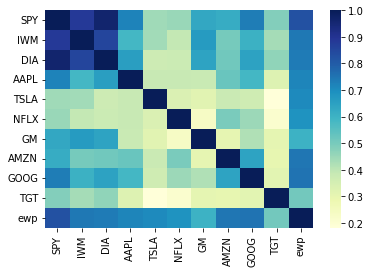

In [1059]:
import seaborn as sns
sns.heatmap(corr_data, cmap= "YlGnBu")